![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/68886973-eca24380-06f6-11ea-8327-3e9a22e22b43.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# Health and Obesity trends

Let's put in practice the topics covered in the course and analyze health and obesity trends.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [4]:
import numpy as np
import pandas as pd
import sqlite3
import requests

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the dump of `USDA Food Composition Database` into a `food_df` DataFrame variable.

The National Nutrient Database (NNDB) is provided by the [USDA](https://ndb.nal.usda.gov/ndb/) to allow the public to get standardized information on foods. They document the database and all supporting information on the USDA website.

> Although the file format says "txt", we call these plain CSVs files and read it using `read_csv` method. Be aware of parsing correctly `NaN` values, data separator, encoding, quotechar and any other parsing option you think necessary.

Here's a preview of that file:

In [5]:
!head /content/FOOD_DES.txt

~01001~^~0100~^~Butter, salted~^~BUTTER,WITH SALT~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01002~^~0100~^~Butter, whipped, with salt~^~BUTTER,WHIPPED,W/ SALT~^^^~Y~^^0^^6.38^^^
~01003~^~0100~^~Butter oil, anhydrous~^~BUTTER OIL,ANHYDROUS~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01004~^~0100~^~Cheese, blue~^~CHEESE,BLUE~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01005~^~0100~^~Cheese, brick~^~CHEESE,BRICK~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01006~^~0100~^~Cheese, brie~^~CHEESE,BRIE~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01007~^~0100~^~Cheese, camembert~^~CHEESE,CAMEMBERT~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01008~^~0100~^~Cheese, caraway~^~CHEESE,CARAWAY~^^^^^0^^6.38^4.27^8.79^3.87
~01009~^~0100~^~Cheese, cheddar (Includes foods for USDA's Food Distribution Program)~^~CHEESE,CHEDDAR~^^^~Y~^^0^^^^^
~01010~^~0100~^~Cheese, cheshire~^~CHEESE,CHESHIRE~^^^^^0^^6.38^4.27^8.79^3.87


The column names are taken from the original documentation for this dataset.

> Use the given column names while reading the data.

In [6]:
column_names = ['NDB_No', 'FdGrp_Cd', 'Long_Desc', 'Shrt_Desc', 'ComName',
                'ManufacName', 'Survey', 'Ref_desc', 'Refuse', 'SciName',
                'N_Factor', 'Pro_Factor', 'Fat_Factor', 'CHO_Factor']

In [24]:
# Read the dataset
file_path = '/content/FOOD_DES.txt'
food_df = pd.read_csv(file_path,
                   names=column_names,
                   sep='^',
                   header=None,
                   quotechar='~',
                   encoding='iso-8859-1')

# Display the first few rows
food_df.head()

,NDB_No,FdGrp_Cd,Long_Desc,Shrt_Desc,ComName,ManufacName,Survey,Ref_desc,Refuse,SciName,N_Factor,Pro_Factor,Fat_Factor,CHO_Factor
0,1001,100,"Butter, salted","BUTTER,WITH SALT",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
1,1002,100,"Butter, whipped, with salt","BUTTER,WHIPPED,W/ SALT",NaN,NaN,Y,NaN,0.0,NaN,6.38,NaN,NaN,NaN
2,1003,100,"Butter oil, anhydrous","BUTTER OIL,ANHYDROUS",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
3,1004,100,"Cheese, blue","CHEESE,BLUE",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
4,1005,100,"Cheese, brick","CHEESE,BRICK",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87


> Check for Missing Values

In [25]:
food_df.isnull().sum()

,0
NDB_No,0
FdGrp_Cd,0
Long_Desc,0
Shrt_Desc,0
ComName,2344
ManufacName,2091
Survey,1135
Ref_desc,1803
Refuse,2
SciName,2217


How many products do we have?

In [26]:
total_rows = food_df.shape[0]

print(f"Total number of rows (products): {total_rows}")

Total number of rows (products): 2429


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Variables distribution

Analyze how values are distributed:

- Create an histogram of `Refuse` variable.
- Create a boxplot of `N_Factor` variable.

<Axes: ylabel='Frequency'>

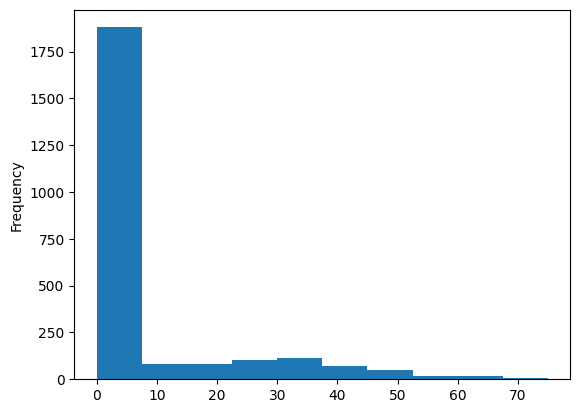

In [27]:
food_df['Refuse'].plot(kind='hist')

<Axes: >

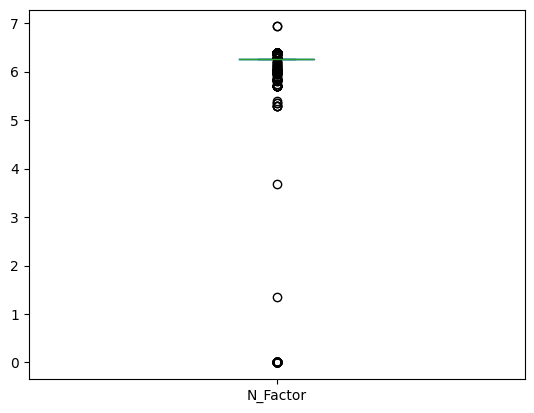

In [28]:
food_df['N_Factor'].plot(kind='box')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which are the top-10 food manufacturers with more products on `food_df`.

In [29]:
# Count the number of products for each manufacturer
top_manufacturers = food_df['ManufacName'].value_counts().head(10)

print("Top 10 Food Manufacturers with Most Products:")
print(top_manufacturers)

Top 10 Food Manufacturers with Most Products:
ManufacName
The Quaker Oats, Co.    71
MEAD JOHNSON            40
MOM Brands              31
ABBOT NUTRTION          26
Post Foods, LLC         21
Kraft Foods, Inc.       18
Chobani                 17
B&G Foods, Inc          13
GERBER                  12
Campbell Soup Co.       10
Name: count, dtype: int64


Also create a bar plot showing that results.

<Axes: xlabel='ManufacName'>

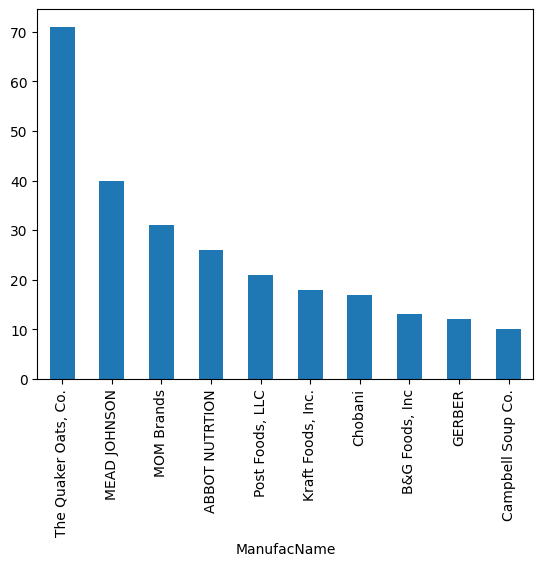

In [33]:
food_df['ManufacName'].value_counts()[:10].plot(kind='bar')

In [31]:
import matplotlib.pyplot as plt

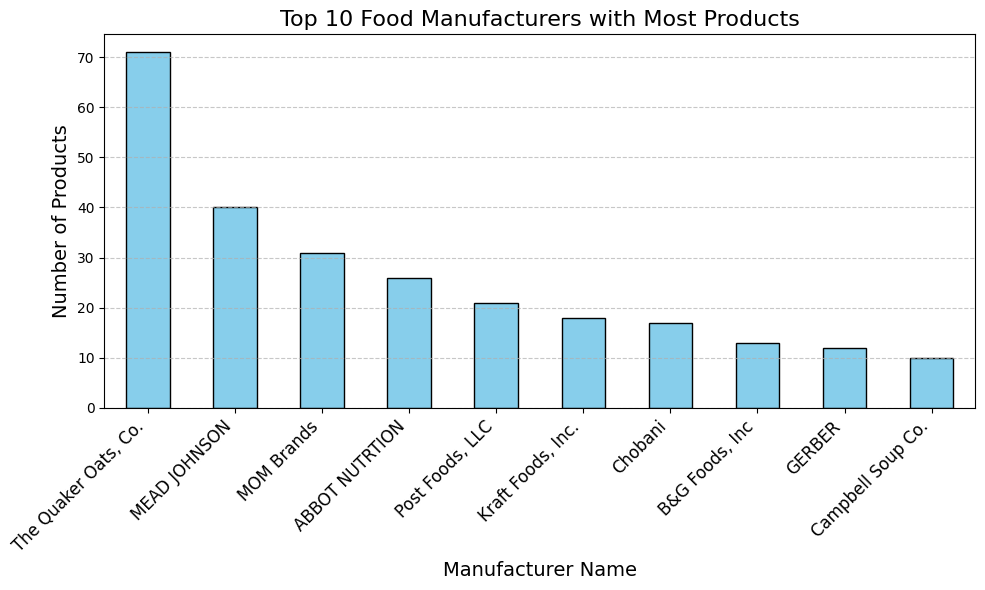

In [32]:
# your code goes here
plt.figure(figsize=(10, 6))
top_manufacturers.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Food Manufacturers with Most Products', fontsize=16)
plt.xlabel('Manufacturer Name', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Analyzing Starbucks nutrition facts

Starbucks is an American coffee chain founded in Seattle. It serves both beverages and food.

<img width="650" alt="Starbucks" src="https://user-images.githubusercontent.com/7065401/68891327-57f01380-06ff-11ea-8461-eb35ba0c3bb0.png">

We'll analyze the nutritional information for Starbucks’ drink menu items using this [Nutrition facts for Starbucks drinks](https://www.kaggle.com/starbucks/starbucks) data. All nutritional information for drinks are for a 12oz serving size.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Getting Starbucks' drinks information

- Create an sqlite3 connection to the `starbucks.db` SQLite3 database.
- Read from the `drinks` table just the items with more than 100 calories and save them to a `drinks_df` DataFrame variable.

In [34]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/starbucks.db')

In [36]:
# SQL query to select drinks with more than 100 calories
query = """
SELECT *
FROM drinks
WHERE Calories > 100;
"""

# Execute query and load data into a DataFrame
drinks_df = pd.read_sql_query(query, conn)
conn.close()
# Display the first few rows
drinks_df.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
0,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
1,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0
2,Iced Espresso Classics - Caffe Mocha,140.0,2.5,23.0,0.0,5.0,90.0
3,Iced Espresso Classics - Caramel Macchiato,130.0,2.5,21.0,0.0,5.0,65.0
4,Tazo® Bottled Black Mango,150.0,0.0,38.0,0.0,0.0,15.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which is the item with the highest calories?

In [37]:
max_calories = drinks_df['Calories'].max()
max_calories_item = drinks_df.loc[drinks_df['Calories'] == max_calories]
max_calories_item

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
31,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create two groups of items: "`less or equal 150 calories`" and "`more 150 calories`"

In [38]:
less_equal_150_cal = drinks_df[drinks_df['Calories'] <= 150]
less_equal_150_cal.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
0,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
1,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0
2,Iced Espresso Classics - Caffe Mocha,140.0,2.5,23.0,0.0,5.0,90.0
3,Iced Espresso Classics - Caramel Macchiato,130.0,2.5,21.0,0.0,5.0,65.0
4,Tazo® Bottled Black Mango,150.0,0.0,38.0,0.0,0.0,15.0


In [39]:
more_150_cal = drinks_df[drinks_df['Calories'] > 150]
more_150_cal.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
17,Starbucks® Doubleshot Protein Dark Chocolate,210.0,2.5,33.0,2.0,20.0,115.0
18,Starbucks® Doubleshot Protein Vanilla,200.0,2.5,34.0,2.0,20.0,120.0
30,Hot Chocolate,320.0,9.0,47.0,4.0,14.0,160.0
31,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0
32,Caffè Latte,190.0,7.0,19.0,0.0,13.0,170.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Compare item characteristics

Create a `compare_groups()` function that compares a given field of both groups of data, `less_equal_150_cal` and `more_150_cal`, by showing two overlapped histograms.

- You should use different colors per histogram. Also add a little bit of opacity (use `alpha=0.4`).
- The function MUST check that the given field exists, and raise `ValueError` with a "Field not found" message otherwise.


In [42]:
def compare_groups(field):
    if (field in less_equal_150_cal.columns):
        less_equal_150_cal[field].plot(kind='hist', color='blue', alpha=0.4, title=field)
        more_150_cal[field].plot(kind='hist', color='red', alpha=0.4)
    else:
        raise ValueError(f"Field '{field}' not found")

Validate your function showing a comparison of the `Calories` per group.

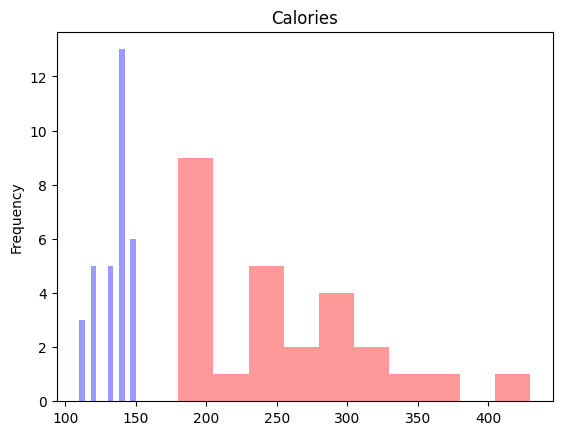

In [43]:
compare_groups('Calories')

Now answer: **Less Calories implies less Sodium?**

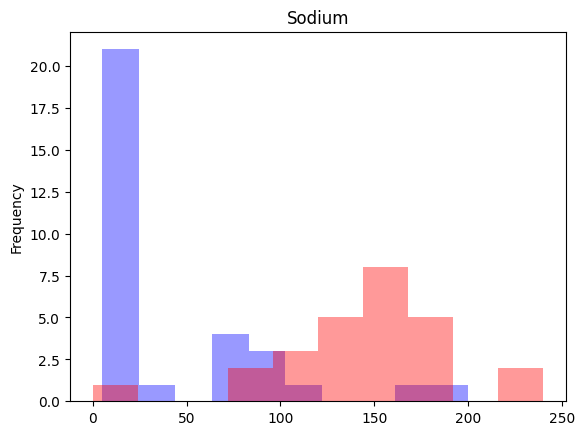

In [44]:
compare_groups('Sodium')  # Comparing Sodium per group

**Less Calories implies less Carbs?**

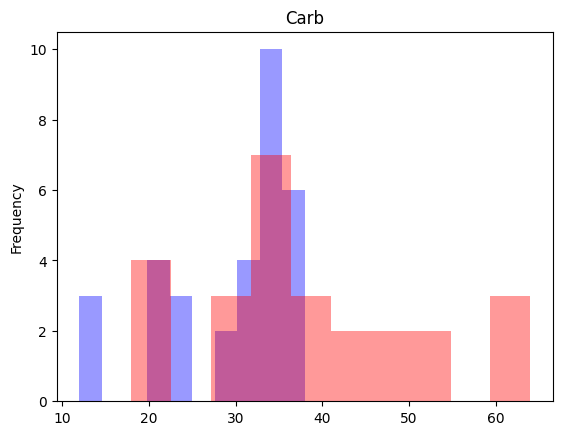

In [45]:
compare_groups('Carb')    # Comparing Carbs per group

**Less Calories implies less Proteins?**

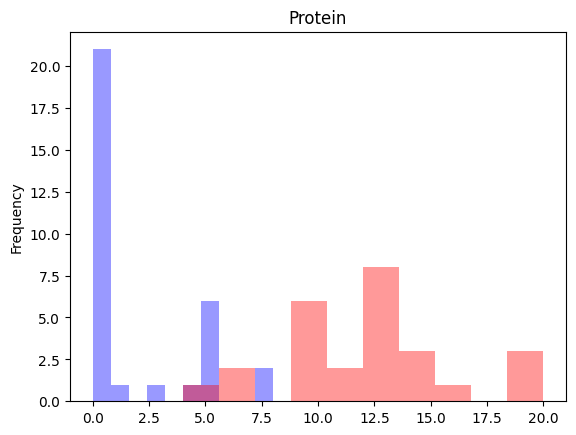

In [46]:
compare_groups('Protein') # Comparing Proteins per group

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Healthy diet interest

In order to measure interest on healthy diets, we'll analyze how many pageviews the article `Healthy diet` received during the last years.

![Food-piramid](https://user-images.githubusercontent.com/7065401/68880286-bf02cd80-06e9-11ea-8d42-ff6dbb539f7d.png)

To get pageviews from Wikipedia, we'll need to use the _Analytics API_. Here you can find [the documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews) to get pageviews from an article.

To get monthly pageviews for a given article, you can use the following endpoint:

```
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{ARTICLE}/monthly/{START}/{END}
```

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get data from Wikipedia using its API

Make a request to Wikipedia API to get monthly page views for `Healthy_diet` article from year 2015 (`2015010100`) to 2019 (`2019100100`).

Store the response in a `pageviews_df` DataFrame variable.

In [48]:
url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Healthy_diet/monthly/2015010100/2019100100"

In [53]:
# Define the URL to fetch pageviews data for the 'Healthy diet' article
ARTICLE = "Healthy_diet"
START = "2015010100"  # Start date: January 1, 2015
END = "2019100100"    # End date: October 1, 2019

url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{ARTICLE}/monthly/{START}/{END}"

# Custom headers with a valid User-Agent
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Make the API request with custom headers
resp = requests.get(url, headers=headers)

# Print the raw response content to debug
print("Response status code:", resp.status_code)
print("Response content:", resp.text)

# If the response is valid JSON, process it
if resp.status_code == 200:
    dict_json = resp.json()
    pageviews_df = pd.DataFrame.from_dict(dict_json['items'])
    print(pageviews_df.head())
else:
    print("Error: API request was not successful.")


Response status code: 200
Response content: {"items":[{"project":"en.wikipedia","article":"Healthy_diet","granularity":"monthly","timestamp":"2015070100","access":"all-access","agent":"all-agents","views":24293},{"project":"en.wikipedia","article":"Healthy_diet","granularity":"monthly","timestamp":"2015080100","access":"all-access","agent":"all-agents","views":41794},{"project":"en.wikipedia","article":"Healthy_diet","granularity":"monthly","timestamp":"2015090100","access":"all-access","agent":"all-agents","views":23606},{"project":"en.wikipedia","article":"Healthy_diet","granularity":"monthly","timestamp":"2015100100","access":"all-access","agent":"all-agents","views":26351},{"project":"en.wikipedia","article":"Healthy_diet","granularity":"monthly","timestamp":"2015110100","access":"all-access","agent":"all-agents","views":24596},{"project":"en.wikipedia","article":"Healthy_diet","granularity":"monthly","timestamp":"2015120100","access":"all-access","agent":"all-agents","views":22641

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### When was the highest search peak?

Save in a `max_pageviews_str` variable the date where `Healthy_diet` article had the highest volume of page views.

Also save a `max_pageview_date` with that previous value parsed to `datetime`.

In [56]:
max_pageviews_df = pageviews_df.loc[pageviews_df['views'] == pageviews_df['views'].max()]

# Extract the timestamp of that row
max_pageviews_str = max_pageviews_df['timestamp'].values[0]
print("Max pageviews date as string:", max_pageviews_str)

# Parse the string timestamp to a datetime object
max_pageviews_date = pd.to_datetime(max_pageviews_str, format='%Y%m%d%H')
print("Max pageviews date as datetime:", max_pageviews_date)

Max pageviews date as string: 2017070100
Max pageviews date as datetime: 2017-07-01 00:00:00


We can draw a quick plot showing the evolution of `views` per month:

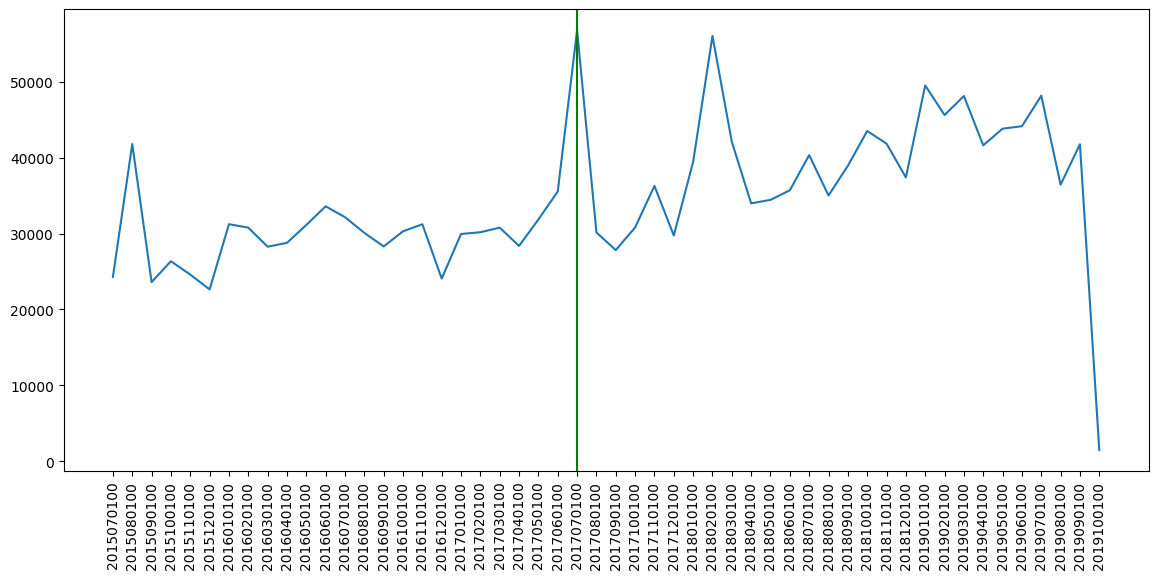

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(pageviews_df['timestamp'], pageviews_df['views'])

plt.axvline(x=max_pageviews_str, color='green')

plt.xticks(rotation=90)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get more data from Wikipedia API

Create a `get_pageviews_count()` function that receives a variable number **article names** as argument, and returns a dictionary with the sum of pageviews during 2018 for each of these article names.

- The function MUST check that at least one parameter is found, and raise a `ValueError` otherwise.

```
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{ARTICLE}/monthly/2018010100/2018123100
```

In [68]:
def get_pageviews_count(*articles):
    # Check if at least one article is provided
    if not articles:
        raise ValueError("At least one article name must be provided")

    # Initialize an empty dictionary to store the results
    pageviews_data = {}

    # Define the URL format for the API request
    url_format = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{}/monthly/2018010100/2018123100"

    # Set the custom User-Agent header
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    # Loop over each article and fetch the pageviews
    for article in articles:
        url = url_format.format(article)
        try:
            # Make the GET request with custom headers
            resp = requests.get(url, headers=headers)

            # Check if the request was successful (status code 200)
            if resp.status_code == 200:
                data = resp.json()
                # Calculate the sum of pageviews for the given article
                total_pageviews = sum(item['views'] for item in data['items'])
                pageviews_data[article] = total_pageviews
            else:
                # Handle the case where the response status is not 200
                pageviews_data[article] = None
                print(f"Error fetching data for {article}. Status code: {resp.status_code}")
        except Exception as e:
            # Handle exceptions (e.g., network issues, request failures)
            pageviews_data[article] = None
            print(f"Exception occurred while fetching data for {article}: {e}")

    return pageviews_data


Calling `get_pageviews_count('Healthy_diet', 'Food', 'Obesity')` should return something like:

```
{'Healthy_diet': 478712, 'Food': 1125874, 'Obesity': 1092577}
```

In [84]:
get_pageviews_count('Healthy_diet', 'Food', 'Obesity')

{'Healthy_diet': 478712, 'Food': 1125874, 'Obesity': 1092577}

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)